## Communicate Data Findings

This project is divided into two major parts.

- In the first part, you will conduct an **exploratory data analysis** on a dataset of your choosing. 
- In the second part, you will take your main findings from your exploration and convey them to others through an **explanatory analysis**.


I will perform an exploratory analysis on data provided by **Ford GoBike**,
a bike-share system provider.

     Dataset :https://www.fordgobike.com/system-data
              https://s3.amazonaws.com/baywheels-data/index.html 
              i.e.  201904-fordgobike-tripdata.csv.zip
     Dataset Contain: 239111 Rows & 14 Columns 
                i.e     duration_sec               
                        start_time                
                        end_time                   
                        start_station_id           
                        start_station_name         
                        start_station_latitude     
                        start_station_longitude    
                        end_station_id             
                        end_station_name           
                        end_station_latitude       
                        end_station_longitude      
                        bike_id                    
                        user_type                 
                        bike_share_for_all_trip

## Explanatory Analysis

In [12]:
#import important packagesabs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

base_color= sns.color_palette()[0]

In [2]:
#import 201904-fordgobike-tripdataset

ford_df= pd.read_csv('201904-fordgobike-tripdata.csv')


In [3]:
ford_df.info()
ford_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 25.5+ MB


(239111, 14)

In [30]:
#summary 
ford_df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,start_time_hour,duration_min
count,239111.000000,239111.000000,239111.000000,239111.000000,239111.000000,239111.000000,239111.000000
mean,802.671199,37.769536,-122.352503,37.766996,-122.343420,13.661697,13.377853
std,1990.006091,0.127698,0.277088,0.343083,1.068144,4.767708,33.166768
min,61.000000,0.000000,-122.453704,0.000000,-122.453704,0.000000,1.016667
25%,349.000000,37.770083,-122.413004,37.770407,-122.411738,9.000000,5.816667
50%,558.000000,37.780760,-122.398285,37.780955,-122.397437,14.000000,9.300000
75%,876.000000,37.797280,-122.291209,37.797320,-122.291376,17.000000,14.600000
max,86114.000000,37.880222,0.000000,37.880222,0.000000,23.000000,1435.233333


In [28]:
# convert dates to timestamps
ford_df.start_time = pd.to_datetime(ford_df['start_time'])
ford_df.end_time = pd.to_datetime(ford_df['end_time'])

In [6]:
#change start_station_id, end_station_id, bike_id to string
ford_df.bike_id = (ford_df['bike_id']).astype(str)
ford_df.start_station_id = (ford_df['start_station_id']).astype(str)
ford_df.end_station_id = (ford_df['end_station_id']).astype(str)

In [7]:
ford_df.user_type= (ford_df['user_type']) .astype('category')

In [8]:
#extract weekday name from start_time
ford_df['start_time_day']=ford_df['start_time'].dt.strftime('%a')

In [9]:
#extract weekday name from start_time
ford_df['start_time_hour']=ford_df['start_time'].dt.hour

In [10]:
ford_df['duration_min']=ford_df['duration_sec']/60

### Bikes rides on weekdays
This visualization shows teh bike rides on weekdays by user( customer or subscriber)

Text(19.00517361111111, 0.5, 'No. of Bike Trips')

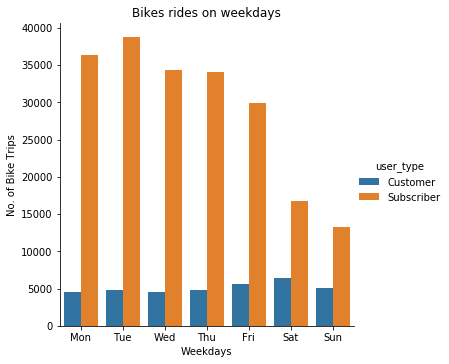

In [26]:

weekday=['Mon',"Tue","Wed","Thu","Fri","Sat","Sun"]
sns.catplot(data=ford_df, x='start_time_day', kind='count', hue='user_type', order=weekday)
plt.title("Bikes rides on weekdays")

plt.xlabel("Weekdays")
plt.ylabel("No. of Bike Trips")

### weekly usage Trends by user type
This visualization shows the bike rides on every hours by customer and subscriber

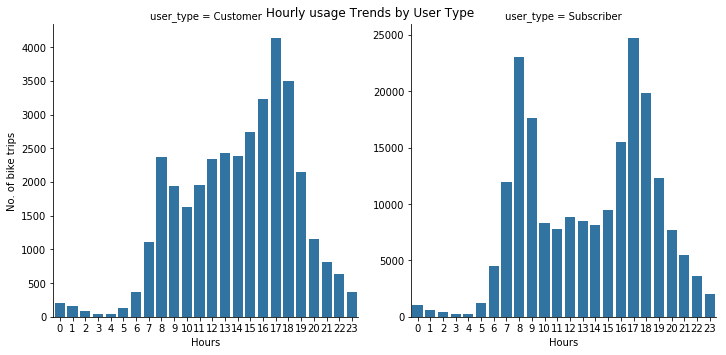

In [14]:

a=sns.catplot(data=ford_df, x='start_time_hour', col='user_type', kind='count', sharey= False,color=base_color)
a.fig.suptitle('Hourly usage Trends by User Type' )

a.set_axis_labels('Hours',"No. of bike trips")

 ### Bike Rides % by user type
 
 This visualization ( Pie chart) shows the Percentage of Customer is 15% and Subscriber is 85%**

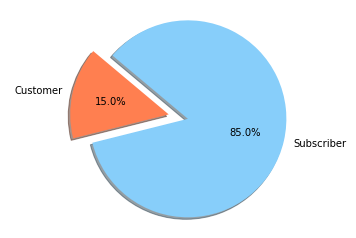

In [31]:

customer = ford_df.query('user_type == "Customer"')['bike_id'].count()
subscriber = ford_df.query('user_type == "Subscriber"')['bike_id'].count()

customerP= (customer/ford_df['bike_id'].count())*100
subscriberP= (subscriber/ford_df['bike_id'].count())*100

customer, subscriber,customerP,subscriberP

# Data to plot
labels = ['Customer', 'Subscriber']
sizes = [customerP,subscriberP]
colors = [ 'coral', 'lightskyblue']
explode = ( 0.2, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


### Showing usage during the weekday for customers and subscribers
The plot perfectly summarizes the diffrent trends for customers and subscribers

    -Customers use the bike sharing system more often on weekends( Saturdayt and Sunday)
    -Subscribers use the bike sharing system mainly on weekdays (Monday to Friday)

Text(0.5, 1.0, 'subscriber')

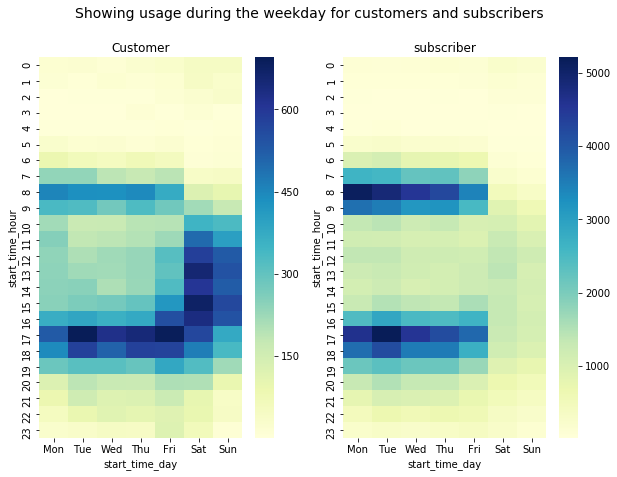

In [21]:

# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(10,7))
plt.suptitle('Showing usage during the weekday for customers and subscribers', fontsize=14)

# Setting the weekday order
ford_df['start_time_day'] = pd.Categorical(ford_df['start_time_day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'])


# heatmap for customers
plt.subplot(1, 2, 1)
customer_df = ford_df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
customer_df = customer_df.pivot("start_time_hour", "start_time_day", "bike_id")
sns.heatmap(customer_df, cmap="YlGnBu")
plt.title("Customer")

# heatmap for subscribers
plt.subplot(1, 2, 2)
subscriber_df = ford_df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
subscriber_df = subscriber_df.pivot("start_time_hour", "start_time_day", "bike_id")
sns.heatmap(subscriber_df, cmap="YlGnBu")
plt.title("subscriber")


In [ ]:
!jupyter nbconvert FordGoBike_Slide-Deck.ipynb --to slides --post serve --template output_toggle